#### Q4. Convolution Neural Networks
1. Design & describe an architecture for CNNs
2. Try different architecture (# of layers, convolution filter sizes, skipping connections)
3. Try different batch normalization techniques
4. drop-out, regulization -> improved generalization?
5. Try different loss functions
6. Try to compress nn (e.g. truncated SVD)
7. Change other major hyperparameter (e.g. learning rates, batch sizes)
8. Train CNN from scratch vs pre-trained and fine-tuning?
9. Compare with Q2 and Q3


In [1]:
import sys
import os
sys.path.append('../')

from CNN import cnn

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch
import time

In [2]:
# Define Dataset Paths and Transformations
current_dir = os.getcwd()
root_dir = os.path.join(current_dir, "../RF_code/Caltech_101")
transform = transforms.Compose([
    transforms.Resize((128,128)),  # Resize images
    transforms.ToTensor(),         # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Create Training and Testing Datasets
train_dataset = cnn.Caltech101Dataset(root_dir, transform=transform, train=True)
test_dataset = cnn.Caltech101Dataset(root_dir, transform=transform, train=False)

train_loader_2 = cnn.DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader_2 = cnn.DataLoader(test_dataset, batch_size=2, shuffle=False)

train_loader_4 = cnn.DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader_4 = cnn.DataLoader(test_dataset, batch_size=4, shuffle=False)

train_loader_8 = cnn.DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader_8 = cnn.DataLoader(test_dataset, batch_size=8, shuffle=False)

train_loader_16 = cnn.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader_16 = cnn.DataLoader(test_dataset, batch_size=16, shuffle=False)

train_loader_32 = cnn.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader_32 = cnn.DataLoader(test_dataset, batch_size=32, shuffle=False)

train_loader_64 = cnn.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_64 = cnn.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# 4-1 -> in the report

In [ ]:
# 4-2 number of layers
layers = [3, 4, 5]
train_loss_layers = []
train_accuracy_layers = []
test_accuracy_layers = []
for i in layers:
    model = cnn.CustomCNN(total_layers=i)

    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_16, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    train_accuracy = cnn.evaluate_model(model, train_loader_16)
    test_accuracy = cnn.evaluate_model(model, test_loader_16)

    train_loss_layers.append(train_losses)
    train_accuracy_layers.append(train_accuracy)
    test_accuracy_layers.append(test_accuracy)

print(train_loss_layers)
print(train_accuracy_layers)
print(test_accuracy_layers)


io.savemat("4-2-layers.mat", {"layers": layers, "train_loss_layers": train_loss_layers, "train_accuracy_layers": train_accuracy_layers, "test_accuracy_layers": test_accuracy_layers})

Epoch 1/100, Loss: 2.2201
Epoch 2/100, Loss: 2.0855
Epoch 3/100, Loss: 1.8072
Epoch 4/100, Loss: 1.7532
Epoch 5/100, Loss: 1.4921
Epoch 6/100, Loss: 1.2433
Epoch 7/100, Loss: 1.0876
Epoch 8/100, Loss: 0.8746
Epoch 9/100, Loss: 0.7991
Epoch 10/100, Loss: 0.6682
Epoch 11/100, Loss: 0.6172
Epoch 12/100, Loss: 0.4580
Epoch 13/100, Loss: 0.4239
Epoch 14/100, Loss: 0.3098
Epoch 15/100, Loss: 0.3282
Epoch 16/100, Loss: 0.2137
Epoch 17/100, Loss: 0.2298
Epoch 18/100, Loss: 0.2502
Epoch 19/100, Loss: 0.1769
Epoch 20/100, Loss: 0.1512
Epoch 21/100, Loss: 0.1429
Epoch 22/100, Loss: 0.1465
Epoch 23/100, Loss: 0.1052
Epoch 24/100, Loss: 0.1150
Epoch 25/100, Loss: 0.0624
Epoch 26/100, Loss: 0.1063
Epoch 27/100, Loss: 0.1292
Epoch 28/100, Loss: 0.1066
Epoch 29/100, Loss: 0.0671
Epoch 30/100, Loss: 0.0713
Epoch 31/100, Loss: 0.0512
Epoch 32/100, Loss: 0.0624
Epoch 33/100, Loss: 0.0422
Epoch 34/100, Loss: 0.0695
Epoch 35/100, Loss: 0.0406
Epoch 36/100, Loss: 0.0439
Epoch 37/100, Loss: 0.0654
Epoch 38/1

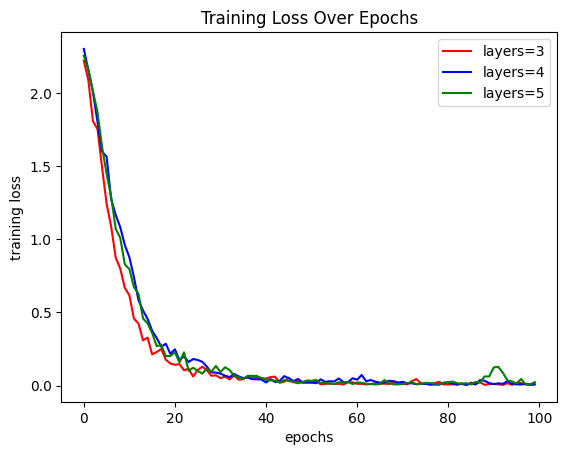

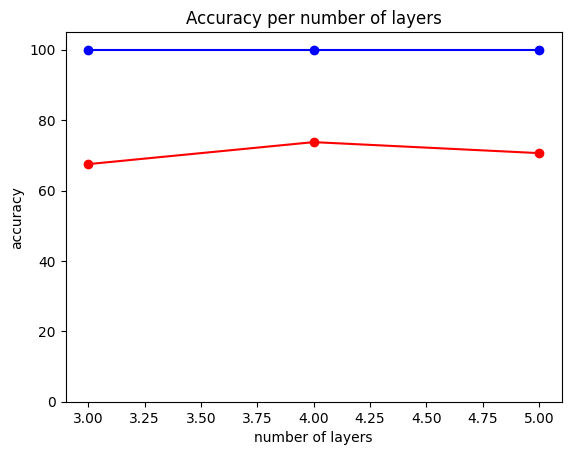

In [9]:
file = io.loadmat("4-2-layers.mat")
layers = file["layers"][0]
train_loss_layers = file["train_loss_layers"]
train_accuracy_layers = file["train_accuracy_layers"][0]
test_accuracy_layers = file["test_accuracy_layers"][0]

plt.plot(train_loss_layers[0], color='red',label='layers=3')
plt.plot(train_loss_layers[1], color='blue',label='layers=4')
plt.plot(train_loss_layers[2], color='green', label='layers=5')
plt.xlabel('epochs')      
plt.ylabel('training loss')    
plt.title('Training Loss Over Epochs')          
plt.legend()                 
plt.show()

plt.plot(layers, train_accuracy_layers, color='blue', marker='o', linestyle='-', label='train')
plt.plot(layers, test_accuracy_layers, color='red', marker='o', linestyle='-', label='test')
plt.xlabel('number of layers')      
plt.ylabel('accuracy')   
plt.ylim([0, 105])   
plt.title('Accuracy per number of layers')                     
plt.show()

# plt.plot(layers, train_accuracy_layers, marker='o', linestyle='-')
# plt.xlabel('number of layers')      
# plt.ylabel('train accuracy')      
# plt.title('Train accuracy per number of layers')                     
# plt.show()

# plt.plot(layers, test_accuracy_layers, marker='o', linestyle='-')
# plt.xlabel('number of layers')      
# plt.ylabel('test accuracy')      
# # plt.ylim([50, 80])
# plt.title('test accuracy per number of layers')                     
# plt.show()

In [ ]:
# size of kernel
kernel_size = [3, 5, 7]
test_accuracy_kernel = []
for i in kernel_size:
    model = cnn.CustomCNN(conv_kernel_size = i)
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_16, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_16)
    test_accuracy_kernel.append(test_accuracy)

io.savemat("4-2-kernel.mat", {"kernel_size": kernel_size, "test_accuracy_kernel": test_accuracy_kernel})

Epoch 1/100, Loss: 2.2534
Epoch 2/100, Loss: 2.0526
Epoch 3/100, Loss: 1.8899
Epoch 4/100, Loss: 1.7906
Epoch 5/100, Loss: 1.4882
Epoch 6/100, Loss: 1.3514
Epoch 7/100, Loss: 1.1801
Epoch 8/100, Loss: 1.0079
Epoch 9/100, Loss: 0.8441
Epoch 10/100, Loss: 0.6894
Epoch 11/100, Loss: 0.6518
Epoch 12/100, Loss: 0.5570
Epoch 13/100, Loss: 0.4648
Epoch 14/100, Loss: 0.4076
Epoch 15/100, Loss: 0.3837
Epoch 16/100, Loss: 0.3432
Epoch 17/100, Loss: 0.3736
Epoch 18/100, Loss: 0.3517
Epoch 19/100, Loss: 0.3003
Epoch 20/100, Loss: 0.1788
Epoch 21/100, Loss: 0.1815
Epoch 22/100, Loss: 0.1699
Epoch 23/100, Loss: 0.1590
Epoch 24/100, Loss: 0.1347
Epoch 25/100, Loss: 0.0949
Epoch 26/100, Loss: 0.1045
Epoch 27/100, Loss: 0.0758
Epoch 28/100, Loss: 0.1283
Epoch 29/100, Loss: 0.0888
Epoch 30/100, Loss: 0.0668
Epoch 31/100, Loss: 0.0510
Epoch 32/100, Loss: 0.0586
Epoch 33/100, Loss: 0.0473
Epoch 34/100, Loss: 0.0580
Epoch 35/100, Loss: 0.0789
Epoch 36/100, Loss: 0.0529
Epoch 37/100, Loss: 0.0425
Epoch 38/1

[76.25 72.5  65.  ]


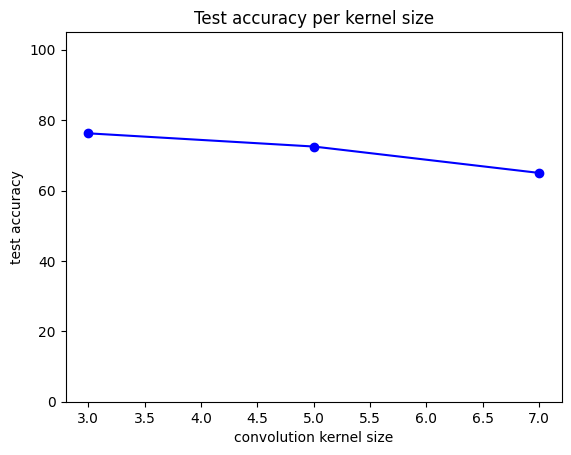

In [30]:
file = io.loadmat("4-2-kernel.mat")
kernel_size = file["kernel_size"][0]
test_accuracy_kernel = file["test_accuracy_kernel"][0]

print(test_accuracy_kernel)
plt.plot(kernel_size, test_accuracy_kernel, color='blue', marker='o', linestyle='-')
plt.xlabel("convolution kernel size")
plt.ylabel("test accuracy")
plt.ylim([0, 105])   
plt.title("Test accuracy per kernel size")
plt.show()

In [13]:
# residual connection
connection = [0, 1, 2]
# connect every 0 layers
# connection every 1 layers
# connect every 2 layers
test_accuracy_connection = []
for i in connection:
    model = cnn.CustomCNN(skip_connection = i)
    criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = cnn.train_model(model, train_loader_16, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
    test_accuracy = cnn.evaluate_model(model, test_loader_16)
    test_accuracy_connection.append(test_accuracy)

io.savemat("4-2-connection.mat", {"connection": connection, "test_accuracy_lr": test_accuracy_connection})

Epoch 1/100, Loss: 2.3187
Epoch 2/100, Loss: 2.1802
Epoch 3/100, Loss: 1.9992
Epoch 4/100, Loss: 1.8854
Epoch 5/100, Loss: 1.7227
Epoch 6/100, Loss: 1.6388
Epoch 7/100, Loss: 1.4416
Epoch 8/100, Loss: 1.2944
Epoch 9/100, Loss: 1.1585
Epoch 10/100, Loss: 0.9428
Epoch 11/100, Loss: 0.8407
Epoch 12/100, Loss: 0.8373
Epoch 13/100, Loss: 0.6360
Epoch 14/100, Loss: 0.5456
Epoch 15/100, Loss: 0.5475
Epoch 16/100, Loss: 0.4240
Epoch 17/100, Loss: 0.3322
Epoch 18/100, Loss: 0.3118
Epoch 19/100, Loss: 0.3087
Epoch 20/100, Loss: 0.2940
Epoch 21/100, Loss: 0.2119
Epoch 22/100, Loss: 0.2525
Epoch 23/100, Loss: 0.2484
Epoch 24/100, Loss: 0.1787
Epoch 25/100, Loss: 0.1473
Epoch 26/100, Loss: 0.1186
Epoch 27/100, Loss: 0.1222
Epoch 28/100, Loss: 0.1036
Epoch 29/100, Loss: 0.0923
Epoch 30/100, Loss: 0.1054
Epoch 31/100, Loss: 0.1007
Epoch 32/100, Loss: 0.0925
Epoch 33/100, Loss: 0.0761
Epoch 34/100, Loss: 0.0799
Epoch 35/100, Loss: 0.0633
Epoch 36/100, Loss: 0.0826
Epoch 37/100, Loss: 0.0694
Epoch 38/1

In [5]:
model = cnn.CustomCNN(skip_connection = 2)
criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

train_losses = cnn.train_model(model, train_loader_16, optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
test_accuracy = cnn.evaluate_model(model, test_loader_16)

print(test_accuracy)

Epoch 1/100, Loss: 2.3092
Epoch 2/100, Loss: 2.1972
Epoch 3/100, Loss: 2.0274
Epoch 4/100, Loss: 1.8460
Epoch 5/100, Loss: 1.7406
Epoch 6/100, Loss: 1.4619
Epoch 7/100, Loss: 1.3837
Epoch 8/100, Loss: 1.1311
Epoch 9/100, Loss: 1.0002
Epoch 10/100, Loss: 0.8957
Epoch 11/100, Loss: 0.7344
Epoch 12/100, Loss: 0.6594
Epoch 13/100, Loss: 0.5842
Epoch 14/100, Loss: 0.5157
Epoch 15/100, Loss: 0.4707
Epoch 16/100, Loss: 0.3644
Epoch 17/100, Loss: 0.3072
Epoch 18/100, Loss: 0.2851
Epoch 19/100, Loss: 0.2256
Epoch 20/100, Loss: 0.2277
Epoch 21/100, Loss: 0.1788
Epoch 22/100, Loss: 0.1253
Epoch 23/100, Loss: 0.1639
Epoch 24/100, Loss: 0.1336
Epoch 25/100, Loss: 0.1026
Epoch 26/100, Loss: 0.1102
Epoch 27/100, Loss: 0.1214
Epoch 28/100, Loss: 0.1479
Epoch 29/100, Loss: 0.1118
Epoch 30/100, Loss: 0.0914
Epoch 31/100, Loss: 0.0907
Epoch 32/100, Loss: 0.0948
Epoch 33/100, Loss: 0.1089
Epoch 34/100, Loss: 0.0462
Epoch 35/100, Loss: 0.0569
Epoch 36/100, Loss: 0.0434
Epoch 37/100, Loss: 0.0400
Epoch 38/1

[73.125 73.75  75.625]


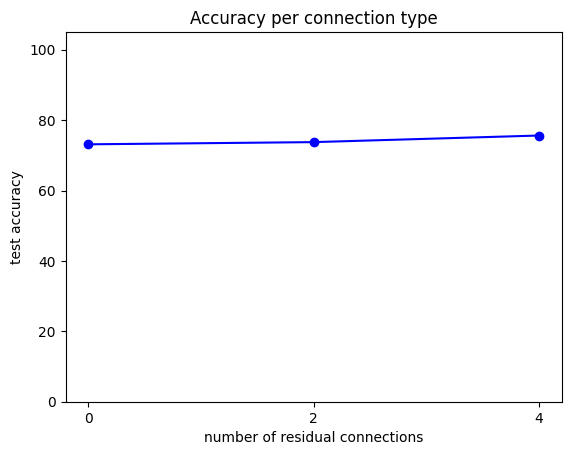

In [32]:
file = io.loadmat("4-2-connection.mat")
connection = file["connection"][0]
connection_num = [1]
test_accuracy_connection = file["test_accuracy_lr"][0]
test_accuracy_connection[2] = 73.75

test_accuracy_connection[1], test_accuracy_connection[2] = test_accuracy_connection[2], test_accuracy_connection[1]

x = [1, 2, 3]

fig, ax1 = plt.subplots()
plt.xticks(x, [0, 2, 4])

print(test_accuracy_connection)    
plt.plot(x, test_accuracy_connection, color='blue', marker='o', linestyle='-')
plt.xlabel("number of residual connections")
plt.ylabel("test accuracy")
plt.ylim([0, 105])   
plt.title("Accuracy per connection type")
plt.show()


In [ ]:
# 4-3 normalization type

normalization_type =  ["batch", "layer", "instance", "group"]
# batch sizes
train_loaders = [train_loader_2, train_loader_4, train_loader_8, train_loader_16, train_loader_32, train_loader_64]
test_loaders = [test_loader_2, test_loader_4, test_loader_8, test_loader_16, test_loader_32, test_loader_64]
test_accuracy_normalization = []

for i in normalization_type:
    accuracy = []
    for j in range(5):
        model = cnn.CustomCNN(normalization=i)
        criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
        optimizer = optim.Adam(model.parameters(), lr=0.0001)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = model.to(device)

        train_losses = cnn.train_model(model, train_loaders[j], optimizer, criterion=nn.CrossEntropyLoss(), num_epochs=100)
        test_accuracy = cnn.evaluate_model(model, test_loaders[j])
        accuracy.append(test_accuracy)

    test_accuracy_normalization.append(accuracy)

Epoch 1/100, Loss: 2.2618
Epoch 2/100, Loss: 1.9547
Epoch 3/100, Loss: 1.7515
Epoch 4/100, Loss: 1.4588
Epoch 5/100, Loss: 1.1117
Epoch 6/100, Loss: 0.7886
Epoch 7/100, Loss: 0.6519
Epoch 8/100, Loss: 0.4495
Epoch 9/100, Loss: 0.3385
Epoch 10/100, Loss: 0.2242
Epoch 11/100, Loss: 0.2179
Epoch 12/100, Loss: 0.1903
Epoch 13/100, Loss: 0.1716
Epoch 14/100, Loss: 0.0720
Epoch 15/100, Loss: 0.1765
Epoch 16/100, Loss: 0.0717
Epoch 17/100, Loss: 0.0541
Epoch 18/100, Loss: 0.0392
Epoch 19/100, Loss: 0.0367
Epoch 20/100, Loss: 0.0295
Epoch 21/100, Loss: 0.0214
Epoch 22/100, Loss: 0.0306
Epoch 23/100, Loss: 0.0266
Epoch 24/100, Loss: 0.0755
Epoch 25/100, Loss: 0.0227
Epoch 26/100, Loss: 0.0271
Epoch 27/100, Loss: 0.0242
Epoch 28/100, Loss: 0.0144
Epoch 29/100, Loss: 0.0484
Epoch 30/100, Loss: 0.0121
Epoch 31/100, Loss: 0.0128
Epoch 32/100, Loss: 0.0274
Epoch 33/100, Loss: 0.0193
Epoch 34/100, Loss: 0.0207
Epoch 35/100, Loss: 0.0119
Epoch 36/100, Loss: 0.0056
Epoch 37/100, Loss: 0.0053
Epoch 38/1

In [8]:
io.savemat("4-3-normalization.mat", {"batch_size": [2, 4, 8, 16, 32], "test_accuracy_normalization": test_accuracy_normalization})

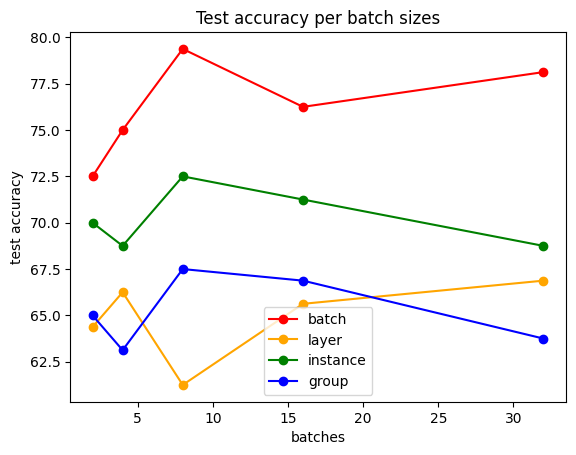

In [11]:
file = io.loadmat("4-3-normalization.mat")
test_accuracy_normalization = file["test_accuracy_normalization"]

batch_size = [2, 4, 8, 16, 32]
# batch_size = np.log2(batch_size)
plt.plot(batch_size, test_accuracy_normalization[0], color='red', marker='o', label='batch') 
plt.plot(batch_size, test_accuracy_normalization[1], color='orange', marker='o', label='layer') 
plt.plot(batch_size, test_accuracy_normalization[2], color='green', marker='o', label='instance') 
plt.plot(batch_size, test_accuracy_normalization[3], color='blue', marker='o', label='group')   
# plt.ylim([70, 75])
plt.xlabel('batches')      
plt.ylabel('test accuracy')    
plt.title('Test accuracy per batch sizes')          
plt.legend()                 
plt.show()

In [12]:
test_accuracy_normalization_np = np.array(test_accuracy_normalization)
print(np.mean(test_accuracy_normalization_np, axis=0))

[67.96875 68.28125 70.15625 70.      69.375  ]


In [ ]:
# 4-4
# 다른 regularization은 maxpool, residual connection 등을 말하는건가?
# 일단 dropout만 함

model_w_do= cnn.CustomCNN(skip_connection=1) # model with dropout, base model
model_wo_do = cnn.CustomCNN(skip_connection=1, dropout=False) # model without dropout

criterion = nn.CrossEntropyLoss()  # Default softmax-based loss
optimizer_w_do = optim.Adam(model_w_do.parameters(), lr=0.0001)
optimizer_wo_do = optim.Adam(model_wo_do.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_w_do = model_w_do.to(device)
model_wo_do = model_wo_do.to(device)

train_losses_w_do = cnn.train_model(model_w_do, train_loader_16, optimizer_w_do, criterion=criterion, num_epochs=100)
test_accuracy_w_do = cnn.evaluate_model(model_w_do, test_loader_16)

train_losses_wo_do = cnn.train_model(model_wo_do, train_loader_16, optimizer_wo_do, criterion=criterion, num_epochs=100)
test_accuracy_wo_do = cnn.evaluate_model(model_wo_do, test_loader_16)

accuracy = [test_accuracy_w_do, test_accuracy_wo_do]
print(accuracy)

Epoch 1/100, Loss: 2.2892
Epoch 2/100, Loss: 2.1158
Epoch 3/100, Loss: 1.8631
Epoch 4/100, Loss: 1.6569
Epoch 5/100, Loss: 1.4772
Epoch 6/100, Loss: 1.2774
Epoch 7/100, Loss: 1.1502
Epoch 8/100, Loss: 0.9944
Epoch 9/100, Loss: 0.8577
Epoch 10/100, Loss: 0.7345
Epoch 11/100, Loss: 0.6340
Epoch 12/100, Loss: 0.5459
Epoch 13/100, Loss: 0.5283
Epoch 14/100, Loss: 0.4606
Epoch 15/100, Loss: 0.3576
Epoch 16/100, Loss: 0.3522
Epoch 17/100, Loss: 0.2840
Epoch 18/100, Loss: 0.2702
Epoch 19/100, Loss: 0.2075
Epoch 20/100, Loss: 0.2119
Epoch 21/100, Loss: 0.1871
Epoch 22/100, Loss: 0.1844
Epoch 23/100, Loss: 0.1625
Epoch 24/100, Loss: 0.1449
Epoch 25/100, Loss: 0.1539
Epoch 26/100, Loss: 0.1345
Epoch 27/100, Loss: 0.1127
Epoch 28/100, Loss: 0.1161
Epoch 29/100, Loss: 0.1045
Epoch 30/100, Loss: 0.0927
Epoch 31/100, Loss: 0.0892
Epoch 32/100, Loss: 0.0753
Epoch 33/100, Loss: 0.0897
Epoch 34/100, Loss: 0.0546
Epoch 35/100, Loss: 0.0574
Epoch 36/100, Loss: 0.0567
Epoch 37/100, Loss: 0.0489
Epoch 38/1

In [11]:
model_regulized = cnn.CustomCNN()
criterion = cnn.RegulizedLoss(0.01, model_regulized)
optimizer = optim.Adam(model_regulized.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_regulized = model_regulized.to(device)

train_regulized = cnn.train_model(model_regulized, train_loader_16, optimizer, criterion=criterion, num_epochs=100)
test_regulized = cnn.evaluate_model(model_regulized, test_loader_16)

print(test_regulized)

Epoch 1/100, Loss: 12.4926
Epoch 2/100, Loss: 12.0315
Epoch 3/100, Loss: 11.6208
Epoch 4/100, Loss: 11.1472
Epoch 5/100, Loss: 10.8087
Epoch 6/100, Loss: 10.5668
Epoch 7/100, Loss: 10.2884
Epoch 8/100, Loss: 9.9739
Epoch 9/100, Loss: 9.7045
Epoch 10/100, Loss: 9.4674
Epoch 11/100, Loss: 9.2539
Epoch 12/100, Loss: 9.0865
Epoch 13/100, Loss: 8.9372
Epoch 14/100, Loss: 8.7929
Epoch 15/100, Loss: 8.6904
Epoch 16/100, Loss: 8.5667
Epoch 17/100, Loss: 8.4091
Epoch 18/100, Loss: 8.3456
Epoch 19/100, Loss: 8.2365
Epoch 20/100, Loss: 8.2170
Epoch 21/100, Loss: 8.1411
Epoch 22/100, Loss: 8.0096
Epoch 23/100, Loss: 7.9260
Epoch 24/100, Loss: 7.8615
Epoch 25/100, Loss: 7.7873
Epoch 26/100, Loss: 7.7301
Epoch 27/100, Loss: 7.6596
Epoch 28/100, Loss: 7.5608
Epoch 29/100, Loss: 7.5266
Epoch 30/100, Loss: 7.4513
Epoch 31/100, Loss: 7.4073
Epoch 32/100, Loss: 7.3620
Epoch 33/100, Loss: 7.2825
Epoch 34/100, Loss: 7.2342
Epoch 35/100, Loss: 7.1558
Epoch 36/100, Loss: 7.1232
Epoch 37/100, Loss: 7.0838
Epo

In [18]:
io.savemat("4-4-dropout.mat", {"accuracy_dropout_w_wo": accuracy})

In [19]:
# 4-5 different loss

model_sm = cnn.CustomCNN(skip_connection=1)
model_sh = cnn.CustomCNN(skip_connection=1)

softmax = nn.CrossEntropyLoss() #softmax based loss
sqauredHinge = cnn.SquaredHingeLoss()  # squared hinge loss
optimizer_sm = optim.Adam(model_sm.parameters(), lr=0.0001)
optimizer_sh = optim.Adam(model_sh.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_sm = model_sm.to(device)
model_sh = model_sh.to(device)

train_losses = cnn.train_model(model_sm, train_loader_16, optimizer_sm, criterion=softmax, num_epochs=100)
test_accuracy = cnn.evaluate_model(model_sm, test_loader_16)

train_losses_sh = cnn.train_model(model_sh, train_loader_16, optimizer_sh, criterion=sqauredHinge, num_epochs=100)
test_accuracy_sh = cnn.evaluate_model(model_sh, test_loader_16)

accuracy = [test_accuracy, test_accuracy_sh]
print(accuracy)


Epoch 1/100, Loss: 2.2544
Epoch 2/100, Loss: 2.0754
Epoch 3/100, Loss: 1.8632
Epoch 4/100, Loss: 1.5505
Epoch 5/100, Loss: 1.3880
Epoch 6/100, Loss: 1.2262
Epoch 7/100, Loss: 1.0537
Epoch 8/100, Loss: 0.9320
Epoch 9/100, Loss: 0.8543
Epoch 10/100, Loss: 0.7446
Epoch 11/100, Loss: 0.6676
Epoch 12/100, Loss: 0.6374
Epoch 13/100, Loss: 0.5544
Epoch 14/100, Loss: 0.4250
Epoch 15/100, Loss: 0.3972
Epoch 16/100, Loss: 0.3027
Epoch 17/100, Loss: 0.2941
Epoch 18/100, Loss: 0.2872
Epoch 19/100, Loss: 0.2408
Epoch 20/100, Loss: 0.2677
Epoch 21/100, Loss: 0.1887
Epoch 22/100, Loss: 0.1838
Epoch 23/100, Loss: 0.1563
Epoch 24/100, Loss: 0.1872
Epoch 25/100, Loss: 0.1407
Epoch 26/100, Loss: 0.1091
Epoch 27/100, Loss: 0.0996
Epoch 28/100, Loss: 0.0832
Epoch 29/100, Loss: 0.0760
Epoch 30/100, Loss: 0.0742
Epoch 31/100, Loss: 0.0541
Epoch 32/100, Loss: 0.0928
Epoch 33/100, Loss: 0.0527
Epoch 34/100, Loss: 0.0498
Epoch 35/100, Loss: 0.0476
Epoch 36/100, Loss: 0.0548
Epoch 37/100, Loss: 0.0677
Epoch 38/1

In [ ]:
# 4-6 truncated svd

# model_svd = cnn.CustomCNN()

# optimizer_svd = optim.Adam(model_svd.parameters(), lr=0.0001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model_svd = model_svd.to(device)

accuracy_svd = []
time_svd = []

# train_losses_wo_svd = cnn.train_model(model_svd, train_loader_16, optimizer_svd, criterion=nn.CrossEntropyLoss(), num_epochs=100)
# torch.save(model_svd, 'model_svd.pth')

model_svd = torch.load('model_svd.pth')

start = time.time()
test_accuracy_wo_svd = cnn.evaluate_model(model_svd, test_loader_16)
end = time.time()
test_time = end - start
accuracy_svd.append(test_accuracy_wo_svd)
time_svd.append(test_time)

model_svd_75 = torch.load('model_svd.pth')
model_svd_75.compress_fc_layers(0.75)

start = time.time()
test_accuracy_svd_75 = cnn.evaluate_model(model_svd_75, test_loader_16)
end = time.time()
test_time_75 = end - start
accuracy_svd.append(test_accuracy_svd_75)
time_svd.append(test_time_75)

model_svd_50 = torch.load('model_svd.pth')
model_svd_50.compress_fc_layers(0.5)

start = time.time()
test_accuracy_svd_50 = cnn.evaluate_model(model_svd_50, test_loader_16)
end = time.time()
test_time_50 = end - start
accuracy_svd.append(test_accuracy_svd_50)
time_svd.append(test_time_50)

model_svd_25 = torch.load('model_svd.pth')
model_svd_25.compress_fc_layers(0.25)

start = time.time()
test_accuracy_svd_25 = cnn.evaluate_model(model_svd_25, test_loader_16)
end = time.time()
test_time_25 = end - start
accuracy_svd.append(test_accuracy_svd_25)
time_svd.append(test_time_25)

print(accuracy_svd)
print(time_svd)

# [75.0, 75.0, 74.375, 70.625]
# [1.9490482807159424, 1.6161274909973145, 1.398756742477417, 1.109236717224121]

Test Accuracy: 75.00%
512
128
Test Accuracy: 75.00%
512
128
Test Accuracy: 74.38%
512
128
Test Accuracy: 70.62%
[75.0, 75.0, 74.375, 70.625]
[1.9490482807159424, 1.6161274909973145, 1.398756742477417, 1.109236717224121]


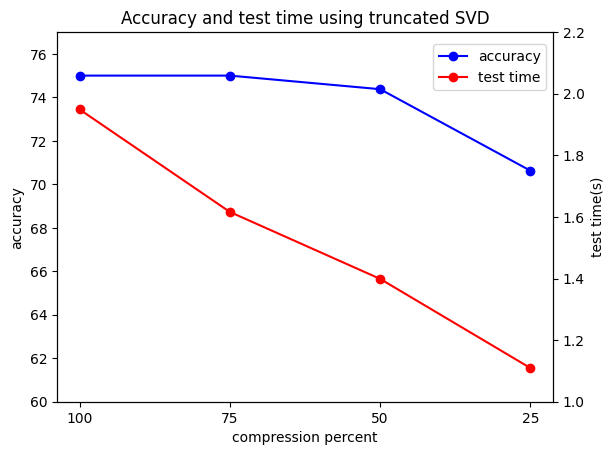

In [25]:
accuracy_svd = [75.0, 75.0, 74.375, 70.625]
time_svd = [1.9490482807159424, 1.6161274909973145, 1.398756742477417, 1.109236717224121]

x = [1, 2, 3, 4]

fig, ax1 = plt.subplots()
plt.xticks(x, [100, 75, 50, 25])
line1, = ax1.plot(x, accuracy_svd, color='blue', marker='o', linestyle='-', label='accuracy')
ax1.set_ylim([60, 77])

ax2 = ax1.twinx()
line2, = ax2.plot(x, time_svd, color='red', marker='o', linestyle='-', label='test time')
ax2.set_ylim([1.0, 2.2])

lines = [line1, line2]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, bbox_to_anchor=(0.9, 0.87))

ax1.set_xlabel('compression percent')      
ax1.set_ylabel('accuracy') 
ax2.set_ylabel('test time(s)')   
plt.title('Accuracy and test time using truncated SVD')                          
plt.show()

In [28]:
model = torch.load('model_svd.pth')
weight_rank = []
for i in [0, 3, 6, 9]:
    weight_matrix = model.fc_layers[i].weight.data
    rank = torch.linalg.matrix_rank(weight_matrix)
    weight_rank.append(int(rank))

print(weight_rank)

[512, 128, 32, 10]


In [6]:
# 4-7 
# learning_rate
learning_rate = [0.0001, 0.0005, 0.001]
train_loss_lr = []
test_accuracy_lr = []
for i in learning_rate:
    base_model = cnn.CustomCNN(skip_connection=1)

    softmax = nn.CrossEntropyLoss() #softmax based loss

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_model = base_model.to(device)
    optimizer = optim.Adam(base_model.parameters(), lr=i)

    train_losses = cnn.train_model(base_model, train_loader_16, optimizer, criterion=softmax, num_epochs=100)
    test_accuracy = cnn.evaluate_model(base_model, test_loader_16)
    train_loss_lr.append(train_losses)
    test_accuracy_lr.append(test_accuracy)



Epoch 1/100, Loss: 2.3217
Epoch 2/100, Loss: 2.1339
Epoch 3/100, Loss: 1.9703
Epoch 4/100, Loss: 1.8044
Epoch 5/100, Loss: 1.6686
Epoch 6/100, Loss: 1.4508
Epoch 7/100, Loss: 1.3374
Epoch 8/100, Loss: 1.1143
Epoch 9/100, Loss: 1.0016
Epoch 10/100, Loss: 0.8625
Epoch 11/100, Loss: 0.6729
Epoch 12/100, Loss: 0.5750
Epoch 13/100, Loss: 0.4671
Epoch 14/100, Loss: 0.4718
Epoch 15/100, Loss: 0.4187
Epoch 16/100, Loss: 0.3467
Epoch 17/100, Loss: 0.3388
Epoch 18/100, Loss: 0.2676
Epoch 19/100, Loss: 0.2865
Epoch 20/100, Loss: 0.2371
Epoch 21/100, Loss: 0.1987
Epoch 22/100, Loss: 0.1836
Epoch 23/100, Loss: 0.1601
Epoch 24/100, Loss: 0.1510
Epoch 25/100, Loss: 0.1254
Epoch 26/100, Loss: 0.1103
Epoch 27/100, Loss: 0.1180
Epoch 28/100, Loss: 0.1012
Epoch 29/100, Loss: 0.1064
Epoch 30/100, Loss: 0.1044
Epoch 31/100, Loss: 0.0806
Epoch 32/100, Loss: 0.1159
Epoch 33/100, Loss: 0.0953
Epoch 34/100, Loss: 0.0781
Epoch 35/100, Loss: 0.0844
Epoch 36/100, Loss: 0.0640
Epoch 37/100, Loss: 0.1143
Epoch 38/1

In [7]:
# 4-7 
# learning_rate - additional

base_model = cnn.CustomCNN(skip_connection=1)

softmax = nn.CrossEntropyLoss() #softmax based loss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = base_model.to(device)
optimizer = optim.Adam(base_model.parameters(), lr=0.00001)

train_losses_add = cnn.train_model(base_model, train_loader_16, optimizer, criterion=softmax, num_epochs=100)
test_accuracy_add = cnn.evaluate_model(base_model, test_loader_16)

print(test_accuracy_add)

Epoch 1/100, Loss: 2.3111
Epoch 2/100, Loss: 2.2653
Epoch 3/100, Loss: 2.2299
Epoch 4/100, Loss: 2.1982
Epoch 5/100, Loss: 2.1502
Epoch 6/100, Loss: 2.1021
Epoch 7/100, Loss: 2.0451
Epoch 8/100, Loss: 2.0121
Epoch 9/100, Loss: 1.9363
Epoch 10/100, Loss: 1.8589
Epoch 11/100, Loss: 1.8293
Epoch 12/100, Loss: 1.7454
Epoch 13/100, Loss: 1.7938
Epoch 14/100, Loss: 1.7326
Epoch 15/100, Loss: 1.6808
Epoch 16/100, Loss: 1.6167
Epoch 17/100, Loss: 1.5517
Epoch 18/100, Loss: 1.5167
Epoch 19/100, Loss: 1.4981
Epoch 20/100, Loss: 1.3993
Epoch 21/100, Loss: 1.4226
Epoch 22/100, Loss: 1.3637
Epoch 23/100, Loss: 1.3281
Epoch 24/100, Loss: 1.3076
Epoch 25/100, Loss: 1.2897
Epoch 26/100, Loss: 1.3129
Epoch 27/100, Loss: 1.1403
Epoch 28/100, Loss: 1.1983
Epoch 29/100, Loss: 1.1528
Epoch 30/100, Loss: 1.1575
Epoch 31/100, Loss: 1.0973
Epoch 32/100, Loss: 1.0810
Epoch 33/100, Loss: 1.0087
Epoch 34/100, Loss: 1.0041
Epoch 35/100, Loss: 0.9792
Epoch 36/100, Loss: 0.9533
Epoch 37/100, Loss: 0.9985
Epoch 38/1

In [20]:

# batch sizes
import time

train_loaders = [train_loader_2, train_loader_4, train_loader_8, train_loader_16, train_loader_32, train_loader_64]
test_loaders = [test_loader_2, test_loader_4, test_loader_8, test_loader_16, test_loader_32, test_loader_64]
test_accuracy_batch = []
training_time = []
for i in range(6):
    base_model = cnn.CustomCNN(skip_connection=1)

    softmax = nn.CrossEntropyLoss() #softmax based loss
    optimizer = optim.Adam(base_model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_model = base_model.to(device)
    
    start = time.time()
    train_losses = cnn.train_model(base_model, train_loaders[i], optimizer, criterion=softmax, num_epochs=100)
    end = time.time()

    tr_time = end - start
    
    test_accuracy = cnn.evaluate_model(base_model, test_loaders[i])
    test_accuracy_batch.append(test_accuracy)
    
    training_time.append(tr_time)



Epoch 1/100, Loss: 2.2815
Epoch 2/100, Loss: 1.9394
Epoch 3/100, Loss: 1.5969
Epoch 4/100, Loss: 1.2955
Epoch 5/100, Loss: 0.9231
Epoch 6/100, Loss: 0.7945
Epoch 7/100, Loss: 0.5611
Epoch 8/100, Loss: 0.5110
Epoch 9/100, Loss: 0.3446
Epoch 10/100, Loss: 0.2698
Epoch 11/100, Loss: 0.1775
Epoch 12/100, Loss: 0.1414
Epoch 13/100, Loss: 0.0801
Epoch 14/100, Loss: 0.0887
Epoch 15/100, Loss: 0.0681
Epoch 16/100, Loss: 0.0467
Epoch 17/100, Loss: 0.0408
Epoch 18/100, Loss: 0.0622
Epoch 19/100, Loss: 0.0326
Epoch 20/100, Loss: 0.0629
Epoch 21/100, Loss: 0.0320
Epoch 22/100, Loss: 0.0374
Epoch 23/100, Loss: 0.0264
Epoch 24/100, Loss: 0.0148
Epoch 25/100, Loss: 0.0065
Epoch 26/100, Loss: 0.0140
Epoch 27/100, Loss: 0.0122
Epoch 28/100, Loss: 0.0345
Epoch 29/100, Loss: 0.0429
Epoch 30/100, Loss: 0.0328
Epoch 31/100, Loss: 0.0353
Epoch 32/100, Loss: 0.0187
Epoch 33/100, Loss: 0.0049
Epoch 34/100, Loss: 0.0091
Epoch 35/100, Loss: 0.0221
Epoch 36/100, Loss: 0.0617
Epoch 37/100, Loss: 0.0348
Epoch 38/1

In [ ]:
print(training_time)
# [330.2760365009308, 249.2319803237915, 198.2343831062317, 165.53637552261353, 154.78512954711914]

[330.2760365009308, 249.2319803237915, 198.2343831062317, 165.53637552261353, 154.78512954711914]


In [14]:
# number of epochs
epochs = [50, 75, 100, 125, 150]
test_accuracy_epoch = []
for i in epochs:
    base_model = cnn.CustomCNN(skip_connection=1)

    softmax = nn.CrossEntropyLoss() #softmax based loss
    optimizer = optim.Adam(base_model.parameters(), lr=0.0001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_model = base_model.to(device)
    
    train_losses = cnn.train_model(base_model, train_loader_16, optimizer, criterion=softmax, num_epochs=i)
    test_accuracy = cnn.evaluate_model(base_model, test_loader_16)
    test_accuracy_epoch.append(test_accuracy)

Epoch 1/50, Loss: 2.2430
Epoch 2/50, Loss: 2.0538
Epoch 3/50, Loss: 1.8857
Epoch 4/50, Loss: 1.7212
Epoch 5/50, Loss: 1.5469
Epoch 6/50, Loss: 1.3072
Epoch 7/50, Loss: 1.2475
Epoch 8/50, Loss: 1.0418
Epoch 9/50, Loss: 0.9639
Epoch 10/50, Loss: 0.8284
Epoch 11/50, Loss: 0.7605
Epoch 12/50, Loss: 0.6371
Epoch 13/50, Loss: 0.6308
Epoch 14/50, Loss: 0.5240
Epoch 15/50, Loss: 0.4434
Epoch 16/50, Loss: 0.3799
Epoch 17/50, Loss: 0.3637
Epoch 18/50, Loss: 0.3317
Epoch 19/50, Loss: 0.2908
Epoch 20/50, Loss: 0.2196
Epoch 21/50, Loss: 0.2428
Epoch 22/50, Loss: 0.1762
Epoch 23/50, Loss: 0.1314
Epoch 24/50, Loss: 0.0992
Epoch 25/50, Loss: 0.1484
Epoch 26/50, Loss: 0.0960
Epoch 27/50, Loss: 0.1142
Epoch 28/50, Loss: 0.1024
Epoch 29/50, Loss: 0.0963
Epoch 30/50, Loss: 0.0852
Epoch 31/50, Loss: 0.0533
Epoch 32/50, Loss: 0.0493
Epoch 33/50, Loss: 0.0395
Epoch 34/50, Loss: 0.0816
Epoch 35/50, Loss: 0.0450
Epoch 36/50, Loss: 0.0722
Epoch 37/50, Loss: 0.0809
Epoch 38/50, Loss: 0.0623
Epoch 39/50, Loss: 0.

In [22]:
batch_size = [2, 4, 8, 16, 32, 64]
io.savemat("4-7-learning_rate.mat", {"learning_rate": learning_rate, "train_loss_lr": train_loss_lr, "test_accuracy_lr": test_accuracy_lr})
io.savemat("4-7-batch.mat", {"batch_size": batch_size, "test_accuracy_batch": test_accuracy_batch})
io.savemat("4-7-epoch(batch=16).mat", {"epochs": epochs, "test_accuracy_epoch": test_accuracy_epoch})

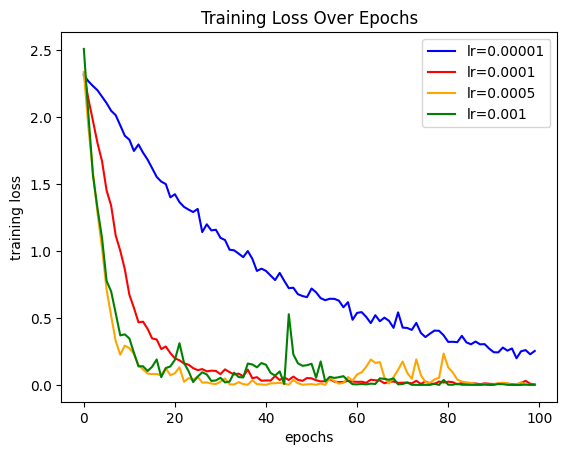

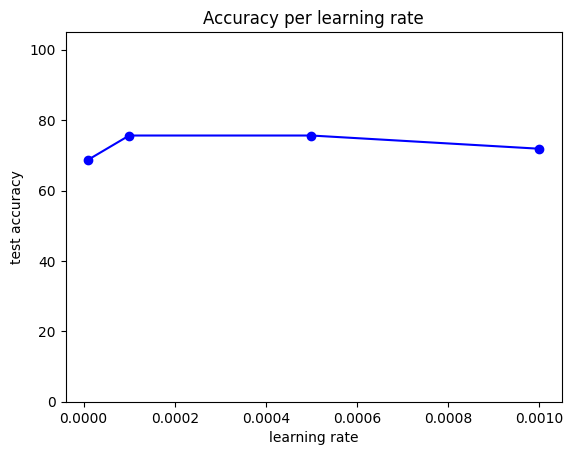

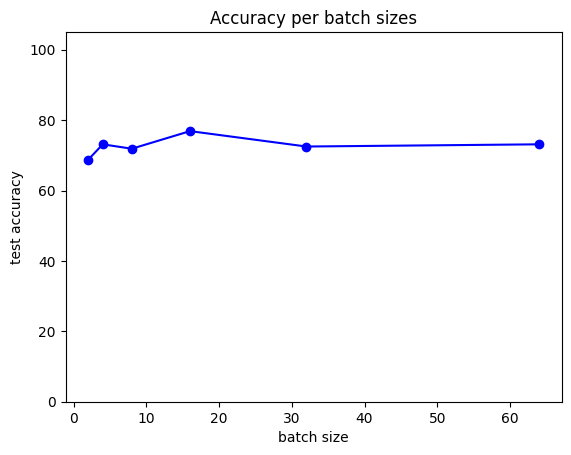

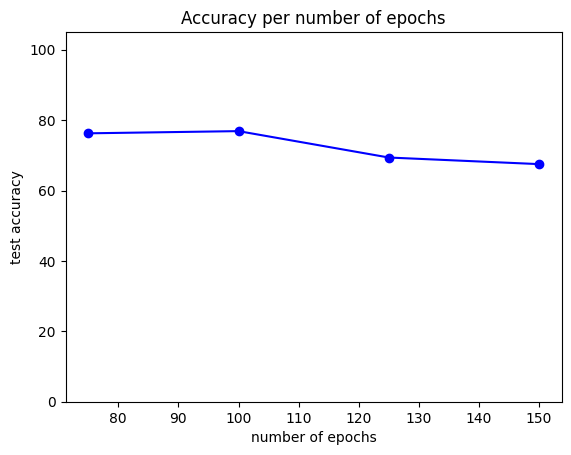

In [8]:
# learning_rate = [0.0001, 0.0005, 0.001, 0.005]
# train_losses_add = cnn.train_model(base_model, train_loader_16, optimizer, criterion=softmax, num_epochs=100)
# test_accuracy_add = cnn.evaluate_model(base_model, test_loader_16)

file_learning_rate = io.loadmat("4-7-learning_rate.mat")
learning_rate = file_learning_rate["learning_rate"][0]
train_loss_lr = file_learning_rate["train_loss_lr"]
test_accuracy_lr = file_learning_rate["test_accuracy_lr"][0]
learning_rate = np.insert(learning_rate, 0, 0.00001)
test_accuracy_lr = np.insert(test_accuracy_lr, 0, test_accuracy_add)

file_batch = io.loadmat("4-7-batch.mat")
test_accuracy_batch = file_batch["test_accuracy_batch"][0]

file_epoch = io.loadmat("4-7-epoch.mat")
epochs = file_epoch["epochs"][0][1:]
test_accuracy_epoch = file_epoch["test_accuracy_epoch"][0][1:]

plt.plot(train_losses_add, color='blue', label='lr=0.00001')
plt.plot(train_loss_lr[0], color='red', label='lr=0.0001')
plt.plot(train_loss_lr[1], color='orange', label='lr=0.0005')
plt.plot(train_loss_lr[2], color='green', label='lr=0.001')
# plt.plot(train_loss_lr[3], color='blue', label='lr=0.001')
plt.xlabel('epochs')      
plt.ylabel('training loss')    
plt.title('Training Loss Over Epochs')          
plt.legend()                 
plt.show()

plt.plot(learning_rate, test_accuracy_lr, color='blue', marker='o', linestyle='-')   
plt.ylim([0, 105])
plt.xlabel("learning rate")
plt.ylabel("test accuracy")
plt.title("Accuracy per learning rate")
plt.show()

batch_size = [2, 4, 8, 16, 32, 64]
plt.plot(batch_size, test_accuracy_batch, color='blue', marker='o', linestyle='-')   
plt.ylim([0, 105])
plt.xlabel("batch size")
plt.ylabel("test accuracy")
plt.title("Accuracy per batch sizes")
plt.show()

plt.plot(epochs, test_accuracy_epoch, color='blue', marker='o', linestyle='-')   
plt.ylim([0, 105])
plt.xlabel("number of epochs")
plt.ylabel("test accuracy")
plt.title("Accuracy per number of epochs")
plt.show()